In [6]:
import pandas as pd
import collections 
import matplotlib.pyplot as plt


In [7]:
business = pd.read_csv('../sandwiches.csv')
review = pd.read_csv('../sandwiches_review.csv')

In [8]:
### DATA SUMMARY
print(business.loc[1])

Unnamed: 0                                                      1
business_id                                jGennaZUr2MsJyRhijNBfA
name                                              Legal Sea Foods
address                                           1 Harborside Dr
city                                                       Boston
state                                                          MA
postal_code                                                 02128
latitude                                                42.363442
longitude                                              -71.025781
stars                                                         3.5
review_count                                                  856
is_open                                                         1
attributes      {'NoiseLevel': "u'average'", 'BikeParking': 'F...
categories      Sandwiches, Food, Restaurants, Breakfast & Bru...
hours           {'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...
Name: 1, d

In [9]:
print(review.loc[1])

Unnamed: 0                                                      1
review_id                                  8IkgIe8Ih9_kGPONsGyRKw
user_id                                    78G0GrPhgdh2hRHly3L2gQ
business_id                                DbXHNl890xSXNiyRczLWAg
stars_x                                                       5.0
useful                                                          0
funny                                                           0
cool                                                            0
text            You've gotta try this place. We went for brunc...
date                                          2018-06-09 20:30:29
Unnamed: 0.1                                                  123
name                                                Orlando Meats
address                                 1035 Orlando Ave, Ste 105
city                                                  Winter Park
state                                                          FL
postal_cod

In [10]:
print(business.groupby(['state'])['business_id'].count())

state
BC     654
CO     135
FL    1154
GA     856
MA    1891
OH     719
OR    1025
TX     735
WA     103
Name: business_id, dtype: int64


In [11]:
# business.head()

In [12]:
# review['text'].tolist()

In [13]:
print(business.groupby(['state'])['review_count'].sum())


state
BC     29480
CO     12768
FL     94128
GA     91671
MA    197817
OH     39346
OR    116833
TX    112443
WA      6459
Name: review_count, dtype: int64


In [ ]:
stars_average_state = business.groupby(['state'])['stars'].mean()
stars_average_state

state
BC    3.520642
CO    3.544444
FL    3.621317
GA    3.358645
MA    3.512956
OH    3.356745
OR    3.749756
TX    3.584354
WA    3.480583
Name: stars, dtype: float64

In [50]:
stars_average_state = pd.read_excel('../stars.xlsx')

,state,stars
0,BC,3.520642
1,CO,3.544444
2,FL,3.621317
3,GA,3.358645
4,MA,3.512956
5,OH,3.356745
6,OR,3.749756
7,TX,3.584354
8,WA,3.480583


In [16]:


### RESTRANUANT SCORE
res_score = business.groupby(['name'])['stars'].mean()
res_count = review.groupby(['name'])['name'].count()

res_score.sort_values()
res_count.sort_values()


### TO SEE THE OVERALL CATEGORIES FREQUENCY
def word_order(dataframe,separator):
    text = []
    for i in list(dataframe):
        j = i.split(separator)
        for k in j:
            text.append(k)
    word_counts = collections.Counter(text)
    return sorted(word_counts.items(),key=lambda x:x[1],reverse=True)


word_order(review['categories'], ', ')




[('Restaurants', 724644),
 ('Sandwiches', 724644),
 ('Food', 374972),
 ('Breakfast & Brunch', 210264),
 ('Salad', 148710),
 ('Nightlife', 145955),
 ('American (Traditional)', 143258),
 ('Bars', 141647),
 ('Coffee & Tea', 137034),
 ('American (New)', 130237),
 ('Burgers', 105790),
 ('Pizza', 105476),
 ('Delis', 83337),
 ('Cafes', 81443),
 ('Bakeries', 74957),
 ('Italian', 59300),
 ('Event Planning & Services', 57644),
 ('Fast Food', 55588),
 ('Desserts', 55154),
 ('Caterers', 48994),
 ('Specialty Food', 46633),
 ('Soup', 46133),
 ('Vegetarian', 44150),
 ('Seafood', 39807),
 ('Barbeque', 37066),
 ('Beer', 36382),
 ('Wine & Spirits', 36382),
 ('Bagels', 34111),
 ('Pubs', 33190),
 ('Chicken Wings', 31967),
 ('Cocktail Bars', 30006),
 ('Diners', 29767),
 ('Vegan', 29758),
 ('Southern', 27359),
 ('Gluten-Free', 25751),
 ('Food Trucks', 24687),
 ('Sports Bars', 24256),
 ('Vietnamese', 22867),
 ('Mediterranean', 22401),
 ('Juice Bars & Smoothies', 22120),
 ('Food Stands', 22013),
 ('Comfort Fo

In [17]:

### TO SEE THE CATEGORIES FREQUENCY BY SOCRE
word_order(review[review['stars_y']>=4]['categories'], ', ')
word_order(review[review['stars_y']<=2]['categories'], ', ')


[('Restaurants', 13038),
 ('Sandwiches', 13038),
 ('Pizza', 4873),
 ('Chicken Wings', 4323),
 ('Fast Food', 4140),
 ('Food', 3828),
 ('Salad', 3006),
 ('Soup', 1915),
 ('Breakfast & Brunch', 1593),
 ('Delis', 1373),
 ('Bagels', 1355),
 ('Bakeries', 1344),
 ('Coffee & Tea', 988),
 ('American (Traditional)', 859),
 ('Italian', 694),
 ('Burgers', 624),
 ('Food Delivery Services', 609),
 ('American (New)', 496),
 ('Caterers', 460),
 ('Event Planning & Services', 460),
 ('Cafes', 362),
 ('Bars', 326),
 ('Nightlife', 326),
 ('Sports Bars', 290),
 ('Shopping', 210),
 ('Seafood', 208),
 ('Donuts', 206),
 ('Desserts', 203),
 ('Greek', 149),
 ('Cheesesteaks', 116),
 ('Chicken Shop', 103),
 ('Juice Bars & Smoothies', 91),
 ('Steakhouses', 88),
 ('Ice Cream & Frozen Yogurt', 82),
 ('Comfort Food', 76),
 ('Grocery', 66),
 ('Barbeque', 57),
 ('Soul Food', 54),
 ('Flowers & Gifts', 51),
 ('Florists', 51),
 ('Diners', 41),
 ('Internet Cafes', 38),
 ('Pharmacy', 34),
 ('Health & Medical', 34),
 ('Dance

In [18]:


### TO SEE THE WORD FREQUENCY BY SOCRE
word_order(review[review['stars_x']>=4]['text'], ' ')
word_order(review[review['stars_x']<=2]['text'], ' ')



[('the', 665130),
 ('and', 492286),
 ('I', 438855),
 ('to', 420173),
 ('a', 373449),
 ('was', 309170),
 ('', 241015),
 ('of', 216825),
 ('for', 178212),
 ('it', 162491),
 ('in', 156354),
 ('is', 147039),
 ('that', 139704),
 ('my', 131121),
 ('but', 118115),
 ('not', 115863),
 ('on', 108987),
 ('The', 108428),
 ('they', 107308),
 ('this', 106925),
 ('with', 106759),
 ('at', 92001),
 ('have', 91699),
 ('were', 88482),
 ('had', 86121),
 ('we', 85677),
 ('be', 79357),
 ('you', 78775),
 ('food', 70102),
 ('so', 64932),
 ('just', 60063),
 ('me', 59382),
 ('are', 57330),
 ('like', 56878),
 ('place', 53257),
 ('as', 52785),
 ('get', 49663),
 ('out', 49379),
 ('our', 48782),
 ('there', 48113),
 ('order', 47781),
 ('or', 46361),
 ('from', 45016),
 ('if', 44474),
 ('up', 44041),
 ('one', 43759),
 ('would', 43134),
 ('no', 42885),
 ('an', 42735),
 ('their', 41389),
 ('when', 41172),
 ('about', 40666),
 ('time', 39550),
 ('ordered', 38509),
 ('We', 36979),
 ('all', 36324),
 ('been', 36153),
 ('beca

In [19]:
### Analysis: Reasons of abnorm review
good_to_bad = review[(review['stars_y']<2)&(review['stars_x']>4)]['text']
bad_to_good = review[(review['stars_y']>4)&(review['stars_x']<2)]['text']
word_order(good_to_bad, ' ')
word_order(bad_to_good, ' ')



[('the', 23621),
 ('and', 18334),
 ('I', 16300),
 ('to', 16266),
 ('a', 13148),
 ('was', 10958),
 ('', 8011),
 ('of', 7997),
 ('for', 6594),
 ('in', 6090),
 ('it', 5522),
 ('that', 5368),
 ('is', 4937),
 ('my', 4847),
 ('not', 4500),
 ('this', 4136),
 ('they', 4008),
 ('with', 3841),
 ('on', 3793),
 ('but', 3789),
 ('we', 3524),
 ('The', 3410),
 ('have', 3381),
 ('at', 3332),
 ('had', 3256),
 ('were', 3151),
 ('you', 3144),
 ('be', 3062),
 ('food', 2679),
 ('so', 2470),
 ('me', 2437),
 ('place', 2132),
 ('like', 2002),
 ('as', 1942),
 ('are', 1936),
 ('just', 1936),
 ('there', 1832),
 ('out', 1814),
 ('our', 1798),
 ('from', 1732),
 ('no', 1722),
 ('up', 1689),
 ('get', 1682),
 ('or', 1673),
 ('their', 1663),
 ('We', 1646),
 ('if', 1642),
 ('an', 1629),
 ('order', 1592),
 ('would', 1591),
 ('one', 1562),
 ('about', 1547),
 ('when', 1497),
 ('all', 1464),
 ('your', 1427),
 ('he', 1351),
 ('time', 1351),
 ('because', 1346),
 ('got', 1297),
 ('go', 1280),
 ('very', 1274),
 ('ordered', 126

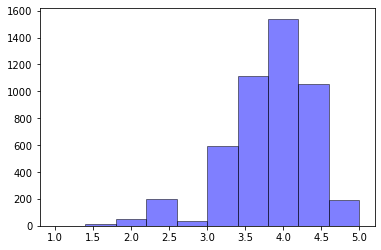

In [20]:

### Visualization
plt.hist(res_score,edgecolor='black',facecolor='blue', alpha=0.5)
review_score = review['stars_x']


<BarContainer object of 5 artists>

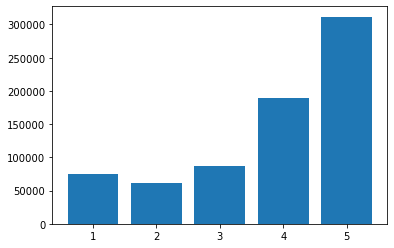

In [21]:
plt.bar(range(1,6),[review_score.value_counts()[1],review_score.value_counts()[2],review_score.value_counts()[3],review_score.value_counts()[4],review_score.value_counts()[5]])

In [57]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.datasets import register_url
from pyecharts.globals import BMapType, ChartType

In [58]:
from pyecharts.charts import Geo
from pyecharts.datasets import register_url
# 绘制美国地区销量分布图
# def draw_usa_map1():
try:
    register_url("https://echarts-maps.github.io/echarts-countries-js/")
except Exception:
    import ssl
    ssl._create_default_https_context = ssl._create_unverified_context
    register_url("https://echarts-maps.github.io/echarts-countries-js/")

df21 = stars_average_state
states1 = df21['state'].tolist()                                # pandas转list
sales21 = df21['stars'].tolist()
list21 = [[states1[i],sales21[i]] for i in range(len(states1))]  # 合并两个list为一个list
maxsales2 = max(sales21)                                         # 计算最大销量值，用作图例的上限

geo = (                                                          # 添加坐标点
    Geo(init_opts=opts.InitOpts(width = "1200px", height = "600px", bg_color = '#EEEEE8'))
    .add_schema(maptype="美国",itemstyle_opts=opts.ItemStyleOpts(color="#323c48", border_color="#111"))
    .add_coordinate('WA',-120.04,47.56)
    .add_coordinate('OR',-120.37,43.77)
    .add_coordinate('CA',-120.44,36.44)
    .add_coordinate('AK',-122.00,28.46)
    .add_coordinate('ID',-114.08,43.80)
    .add_coordinate('NV',-116.44,39.61)
    .add_coordinate('MT',-109.42,47.13)
    .add_coordinate('WY',-107.29,42.96)
    .add_coordinate('UT',-111.19,39.35)
    .add_coordinate('AZ',-111.70,34.45)
    .add_coordinate('HI',-105.25,28.72)
    .add_coordinate('CO',-105.52,38.89)
    .add_coordinate('NM',-106.11,34.45)
    .add_coordinate('ND',-100.22,47.53)
    .add_coordinate('SD',-100.52,44.72)
    .add_coordinate('NE',-99.64,41.65)
    .add_coordinate('KS',-98.53,38.43)
    .add_coordinate('OK',-97.13,35.42)
    .add_coordinate('TX',-98.16,31.03)
    .add_coordinate('MN',-94.26,46.02)
    .add_coordinate('IA',-93.60,42.09)
    .add_coordinate('MO',-92.57,38.48)
    .add_coordinate('AR',-92.43,34.69)
    .add_coordinate('LA',-92.49,31.22)
    .add_coordinate('WI',-89.55,44.25)
    .add_coordinate('MI',-84.62,43.98)
    .add_coordinate('IL',-89.11,40.20)
    .add_coordinate('IN',-86.17,40.08)
    .add_coordinate('OH',-82.71,40.31)
    .add_coordinate('KY',-84.92,37.44)
    .add_coordinate('TN',-86.32,35.78)
    .add_coordinate('MS',-89.63,32.66)
    .add_coordinate('AL',-86.68,32.53)
    .add_coordinate('FL',-81.68,28.07)
    .add_coordinate('GA',-83.22,32.59)
    .add_coordinate('SC',-80.65,33.78)
    .add_coordinate('NC',-78.88,35.48)
    .add_coordinate('VA',-78.24,37.48)
    .add_coordinate('WV',-80.63,38.62)
    .add_coordinate('PA',-77.57,40.78)
    .add_coordinate('NY',-75.22,43.06)
    .add_coordinate('MD',-76.29,39.09)
    .add_coordinate('DE',-75.55,39.09)
    .add_coordinate('NJ',-74.47,40.03)
    .add_coordinate('VT',-72.70,44.13)
    .add_coordinate('NH',-71.64,43.59)
    .add_coordinate('MA',-72.09,42.33)
    .add_coordinate('CT',-72.63,41.67)
    .add_coordinate('RI',-71.49,41.64)
    .add_coordinate('ME',-69.06,45.16)
    .add_coordinate('PR',-75.37,26.42)
    .add_coordinate('DC',-77.04,38.90)
    .add("product1", list21, type_=ChartType.EFFECT_SCATTER)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="product1销量分布图"),
        visualmap_opts=opts.VisualMapOpts(max_ = maxsales2,is_piecewise=True),
    )
    # .render("D:/prod1.html")
)

NonexistentCoordinatesException: 当前地点: ('BC', 3.520642) 坐标不存在, 错误原因: cannot unpack non-iterable NoneType object

In [55]:
# 绘制瑞士地图
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.datasets import register_url

try:
    register_url("https://echarts-maps.github.io/echarts-countries-js/")
except Exception:
    import ssl

    ssl._create_default_https_context = ssl._create_unverified_context
    register_url("https://echarts-maps.github.io/echarts-countries-js/")

geo = (
    Geo()
    .add_schema(maptype="瑞士")
    .set_global_opts(title_opts=opts.TitleOpts(title="瑞士"))
    .render("geo_chart_countries_js.html")
)


In [42]:
df21['stars'].head(3)

state
BC    3.520642
CO    3.544444
FL    3.621317
Name: stars, dtype: float64

In [43]:
stars_average_state = stars_average_state.to_frame()
stars_average_state

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [44]:
print(stars_average_state)

          stars
state          
BC     3.520642
CO     3.544444
FL     3.621317
GA     3.358645
MA     3.512956
OH     3.356745
OR     3.749756
TX     3.584354
WA     3.480583


In [45]:
stars_average_state.head(3)

,stars
state,
BC,3.520642
CO,3.544444
FL,3.621317


In [34]:
list(stars_average_state.columns.values)

['stars']